In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_reward(dirname):
    reward = []
    with open(dirname+'/Simple.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            reward.append(float(row['Environment/Cumulative Reward']))
    return reward

In [3]:
def smooth(scalars, weight: float):  # Weight between 0 and 1
    last = scalars[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1 - weight) * point  # Calculate smoothed value
        smoothed.append(smoothed_val)                        # Save it
        last = smoothed_val                                  # Anchor the last smoothed value

    return smoothed

In [8]:
seeds = [0,1,2,3,4]
obs_types = ["long", "longpre"]

In [9]:
rewards_ppo = {} 
for obs in obs_types:
    rewards_ppo[obs] = []
    for s in seeds:
        rewards_ppo[obs].append(read_reward("transfer_results/ppo_{}_s{}".format(obs, s)))
    rewards_ppo[obs] = np.array(rewards_ppo[obs])

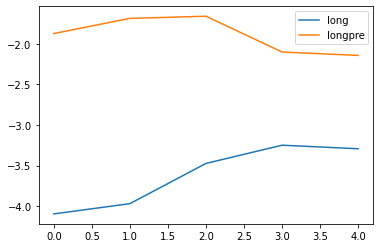

In [15]:
xs = list(range(len(rewards_ppo["long"])))
for obs in obs_types:
    plt.plot(xs, smooth(np.mean(rewards_ppo[obs], axis=1), 0.8), label=obs)
plt.legend()
plt.show()

In [ ]:
rewards_model = {} 
for obs in obs_types:
    rewards_ppo[obs] = []
    for s in seeds:
        rewards_ppo[obs].append(read_reward("transfer_results/ppo_{}_s{}".format(obs, s)))
    rewards_ppo[obs] = np.array(rewards_ppo[obs])